### Project description

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, **Surf** and **Ultimate**. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

### Description of the plans

Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**Surf**<br>
Monthly charge: \\$20<br/>
500 monthly minutes, 50 texts, and 15 GB of data<br/>
After exceeding the package limits:<br/>
1 minute: 3 cents<br/>
1 text message: 3 cents<br/>
1 GB of data: \\$10<br/>

**Ultimate**<br/>
Monthly charge: \\$70<br/>
3000 monthly minutes, 1000 text messages, and 30 GB of data<br/>
After exceeding the package limits:<br/>
1 minute: 1 cent<br/>
1 text message: 1 cent<br/>
1 GB of data: \\$7

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('MAX_COLUMNS', None)
matplotlib.rcParams['figure.figsize'] = (7, 5)

In [2]:
# define the path, and create a list of files
path = r'/datasets'
files = ['megaline_calls.csv', 'megaline_internet.csv', 
         'megaline_messages.csv', 'megaline_plans.csv',
         'megaline_users.csv']

In [3]:
# read the files
calls = pd.read_csv(os.path.join(path, files[0]))
internet = pd.read_csv(os.path.join(path, files[1]))
messages = pd.read_csv(os.path.join(path, files[2]))
plans = pd.read_csv(os.path.join(path, files[3]))
users = pd.read_csv(os.path.join(path, files[4]))

In [4]:
# basic info
calls.shape, internet.shape, messages.shape, plans.shape, users.shape

((137735, 4), (104825, 4), (76051, 3), (2, 8), (500, 8))

In [5]:
dfs = { 
        'calls': calls, 
        'internet': internet, 
        'messages': messages, 
        'plans': plans, 
        'users': users
}

In [6]:
def calculate_missing_values(df):
    """
    Calculate proportion of missing
    values
    """
    return df.isnull().sum() / df.shape[0]

In [7]:
# missing values for calls
calculate_missing_values(calls)

id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

In [8]:
# missing values for internet
calculate_missing_values(internet)

id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

In [9]:
# missing values for messages
calculate_missing_values(messages)

id              0.0
user_id         0.0
message_date    0.0
dtype: float64

In [10]:
# missing values for plans
calculate_missing_values(plans)

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
usd_monthly_pay          0.0
usd_per_gb               0.0
usd_per_message          0.0
usd_per_minute           0.0
plan_name                0.0
dtype: float64

In [11]:
# missing values for users
calculate_missing_values(users)

user_id       0.000
first_name    0.000
last_name     0.000
age           0.000
city          0.000
reg_date      0.000
plan          0.000
churn_date    0.932
dtype: float64

In [12]:
def check_duplicates(df):
    """
    Check for duplicates in the dataset
    """
    return df.duplicated().sum()

In [13]:
# number of duplicates
for df in dfs:
    print('Number of duplicates in {} is {}'.format(df, check_duplicates(dfs[df])))

Number of duplicates in calls is 0
Number of duplicates in internet is 0
Number of duplicates in messages is 0
Number of duplicates in plans is 0
Number of duplicates in users is 0


In [14]:
def check_dtypes(df):
    """
    Check dtypes of the datasets
    """
    return df.dtypes

In [15]:
# data types
for df in dfs: 
    print('-' * 50)
    print('Datatype for {} \n{}'.format(df, check_dtypes(dfs[df])))
   

--------------------------------------------------
Datatype for calls 
id            object
user_id        int64
call_date     object
duration     float64
dtype: object
--------------------------------------------------
Datatype for internet 
id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object
--------------------------------------------------
Datatype for messages 
id              object
user_id          int64
message_date    object
dtype: object
--------------------------------------------------
Datatype for plans 
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object
--------------------------------------------------
Datatype for users 
user_id        int64
first_name    object
last_name     object
age    

In [16]:
def describe_df(df):
    """
    Describe the numeric fields
    """
    return df.describe()

In [17]:
# describe the numeric values
for df in dfs: 
    print('-' * 50)
    print('Numeric info for {} \n{}'.format(df, describe_df(dfs[df])))

--------------------------------------------------
Numeric info for calls 
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000
--------------------------------------------------
Numeric info for internet 
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000
--------------------------------------------------
Numeric info for messages 
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
5

In [18]:
def check_top_5_rows(df):
    """
    Inspect top 5 rows
    """
    return df.head()

In [19]:
# inspect the top 5 rows
for df in dfs: 
    print('-' * 50)
    print('Numeric info for {} \n{}'.format(df, check_top_5_rows(dfs[df])))

--------------------------------------------------
Numeric info for calls 
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
--------------------------------------------------
Numeric info for internet 
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
--------------------------------------------------
Numeric info for messages 
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
-------------------------------------------------

In [20]:
# proportion of users by plan
users['plan'].value_counts(normalize=True)

surf        0.678
ultimate    0.322
Name: plan, dtype: float64

**Conclusion**

1) There are 500 customers who can chose from 1 of 2 plans; These customers in total have made ~137K calls, texted 76K messages, and consumed data 104K bytes in 2018.

2) There are no duplicates.

3) Only `users`  dataframe have missing records in the `churn` column; this is expected as when this data was extracted these customers were active; this implies that at the time there was a 7% churn rate.

4) The date fields are stored as objects and can be coverted to date type objects.

5) There are users who haven't made a call or used the internet; this will have to be investigated.

6) 68% of the users have subscribed to surf plan as opposed to 32% who use ultimate.

### Change the data type for date like fields in all the dataframes

In [21]:
def convert_object_date(col):
    """
    Change the object data type to date
    """
    try:
        return datetime.datetime.strptime(col,  '%Y-%m-%d')
    except:
        return np.nan

In [22]:
# change the data type for the date fields in all the dataframes
calls['call_date'] = calls['call_date'].apply(convert_object_date)

In [23]:
internet['session_date'] = internet['session_date'].apply(convert_object_date)

In [24]:
messages['message_date'] = messages['message_date'].apply(convert_object_date)

In [25]:
users['reg_date'] = users['reg_date'].apply(convert_object_date)

In [26]:
users['churn_date'] = users['churn_date'].apply(convert_object_date)

### Create new features

a) Create age groups

In [27]:
def age_groups(age):
    """
    Create age buckets
    """
    if age < 30:
        return '18-29 years'
    if age < 40:
        return '30-39 years'
    if age < 50:
        return '40-49 years'
    if age < 60:
        return '50-59 years'
    return '60+ years'

In [28]:
users['age_groups'] = users['age'].apply(age_groups)

In [29]:
users['age_groups'].value_counts(normalize=True)

60+ years      0.270
18-29 years    0.240
30-39 years    0.168
40-49 years    0.164
50-59 years    0.158
Name: age_groups, dtype: float64

b) Create month, day and day of week features

In [30]:
def date_features(row):
    """
    Create month, day and day of week
    features
    # https://stackoverflow.com/questions/23690284/pandas-apply-function-that-returns-multiple-values-to-rows-in-pandas-dataframe
    0 - Sunday
    6 - Saturday
    """
    try:
        # return pd.Series([row.month, row.day, row.strftime('%w')])
        return [row.month, row.day, row.strftime('%w')]
    except:
        return row

In [31]:
# create month, day and dow fields for all the dataframes
calls[['month', 'day', 'dow']] = pd.DataFrame(
                                    np.row_stack(
                                            np.vectorize(
                                                date_features, otypes=['O'])(calls['call_date']))).astype(np.uint8)

In [32]:
calls.head()

,id,user_id,call_date,duration,month,day,dow
0,1000_93,1000,2018-12-27,8.52,12,27,4
1,1000_145,1000,2018-12-27,13.66,12,27,4
2,1000_247,1000,2018-12-27,14.48,12,27,4
3,1000_309,1000,2018-12-28,5.76,12,28,5
4,1000_380,1000,2018-12-30,4.22,12,30,0


In [33]:
internet[['month', 'day', 'dow']] = pd.DataFrame(
                                    np.row_stack(
                                            np.vectorize(
                                                date_features, otypes=['O'])(internet['session_date']))).astype(np.uint8)

In [34]:
messages[['month', 'day', 'dow']] = pd.DataFrame(
                                    np.row_stack(
                                            np.vectorize(
                                                date_features, otypes=['O'])(messages['message_date']))).astype(np.uint8)

In [35]:
users[['month', 'day', 'dow']] = pd.DataFrame(
                                    np.row_stack(
                                            np.vectorize(
                                                date_features, otypes=['O'])(users['reg_date']))).astype(np.uint8)

c) Create state field

In [36]:
# create city and state, and clean up the state field
users[['city', 'state']] = users['city'].str.split(',', expand=True)
users['state'].replace(r' MSA', '', regex=True, inplace=True)
users['state'] = users['state'].str.strip()

In [37]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_groups,month,day,dow,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,40-49 years,12,24,1,GA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,18-29 years,8,13,1,WA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,30-39 years,10,21,0,NV
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,50-59 years,1,28,0,OK
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,40-49 years,5,23,3,WA


d) Create churned field

In [38]:
users['has_churned'] = users['churn_date'].apply(lambda x: 1 if x == x else 0)

In [39]:
# proportion churned
users['has_churned'].value_counts(normalize=True)

0    0.932
1    0.068
Name: has_churned, dtype: float64

e) Create the usage per month field for call, internet and messages

In [40]:
calls.head()

,id,user_id,call_date,duration,month,day,dow
0,1000_93,1000,2018-12-27,8.52,12,27,4
1,1000_145,1000,2018-12-27,13.66,12,27,4
2,1000_247,1000,2018-12-27,14.48,12,27,4
3,1000_309,1000,2018-12-28,5.76,12,28,5
4,1000_380,1000,2018-12-30,4.22,12,30,0


In [41]:
def round_up_calls(row):
    """
    Every call is rounded up
    """
    seconds = row * 60
    if seconds % 60 == 0:
        return row
    return np.ceil(row)

In [42]:
# round up the seconds to minutes for every call
# calls['duration'] = calls['duration'].apply(round_up_calls)
calls['duration'] = np.ceil(calls['duration'])

In [43]:
def calculate_aggs(df, fields, agg_var):
    """
    Calculate the number of calls, duration
    and number of payments by user_id and month
    """
    return df.groupby(fields, as_index=False).agg(agg_var)

In [44]:
def calculate_totals(df, agg_var, field='user_id'):
    """
    Calculate totals, including number of bills per user_id
    """
    df = df.groupby(field).agg(agg_var)
    return df.rename(columns={field: 'num_bills'}).reset_index()

In [45]:
# 19% of the calls have a duration of 0
calls[calls['duration'] == 0].shape[0]/ calls.shape[0]

0.1948233927469416

In [46]:
# monthly usage for calls, including total usage
fields = ['user_id', 'month']
agg_var = {'call_date': 'count', 'duration': 'sum'}
monthly_calls = calculate_aggs(calls, fields, agg_var)
monthly_calls.rename(columns={'call_date': 'num_calls', 'duration': 'total_duration', 
                              }, inplace=True)
total_agg_var = {'num_calls': 'sum',
                 'total_duration': 'sum',
                'user_id': 'count'}
total_calls = calculate_totals(monthly_calls, total_agg_var)

In [47]:
monthly_calls.head()

,user_id,month,num_calls,total_duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


In [48]:
total_calls.shape

(481, 4)

In [49]:
total_calls.head()

,user_id,num_calls,total_duration,num_bills
0,1000,16,124.0,1
1,1001,261,1728.0,5
2,1002,113,829.0,3
3,1003,149,1104.0,1
4,1004,370,2772.0,8


In [50]:
# duration per call
total_calls['minutes_per_call'] = total_calls['total_duration'] / total_calls['num_calls']

In [51]:
# avg duration per month
total_calls['avg_duration_per_month'] = total_calls['total_duration'] / 12

In [52]:
# avg duration per bill
total_calls['avg_duration_per_bill'] = total_calls['total_duration'] / total_calls['num_bills']

In [53]:
total_calls.head()

,user_id,num_calls,total_duration,num_bills,minutes_per_call,avg_duration_per_month,avg_duration_per_bill
0,1000,16,124.0,1,7.750000,10.333333,124.000000
1,1001,261,1728.0,5,6.620690,144.000000,345.600000
2,1002,113,829.0,3,7.336283,69.083333,276.333333
3,1003,149,1104.0,1,7.409396,92.000000,1104.000000
4,1004,370,2772.0,8,7.491892,231.000000,346.500000


In [54]:
def round_up_sessions(row):
    """
    Round up monthly sessions
    1024 MB = 1GB
    """
    if row % 1024 == 0:
        return row
    return np.ceil(row)

In [55]:
# 13% of the sessions have a duration of 0
internet[internet['mb_used'] == 0].shape[0]/ internet.shape[0]

0.1311423801574052

In [56]:
# monthly usage for sessions, including total usage
agg_var = {'session_date': 'count', 'mb_used': 'sum'}
monthly_sessions = calculate_aggs(internet, fields, agg_var)
monthly_sessions.rename(columns={'session_date': 'num_sessions', 'mb_used': 'total_mb_used', 
                              }, inplace=True)

monthly_sessions['total_mb_used'] = monthly_sessions['total_mb_used'].apply(round_up_sessions)
total_agg_var = {'num_sessions': 'sum',
                 'total_mb_used': 'sum',
                'user_id': 'count'}
total_sessions = calculate_totals(monthly_sessions, total_agg_var)

In [57]:
total_sessions.shape

(489, 4)

In [58]:
total_sessions.head()

,user_id,num_sessions,total_mb_used,num_bills
0,1000,5,1902.0,1
1,1001,245,80441.0,5
2,1002,124,40296.0,3
3,1003,52,27045.0,1
4,1004,460,156356.0,8


In [59]:
# mb_used per session
total_sessions['mb_used_per_session'] = total_sessions['total_mb_used'] / total_sessions['num_sessions']

In [60]:
# avg sessions per month
total_sessions['avg_sessions_per_month'] = total_sessions['total_mb_used'] / 12

In [61]:
# avg sessions per bill
total_sessions['avg_sessions_per_bill'] = total_sessions['total_mb_used'] / total_sessions['num_bills']

In [62]:
total_sessions.head()

,user_id,num_sessions,total_mb_used,num_bills,mb_used_per_session,avg_sessions_per_month,avg_sessions_per_bill
0,1000,5,1902.0,1,380.400000,158.500000,1902.0
1,1001,245,80441.0,5,328.330612,6703.416667,16088.2
2,1002,124,40296.0,3,324.967742,3358.000000,13432.0
3,1003,52,27045.0,1,520.096154,2253.750000,27045.0
4,1004,460,156356.0,8,339.904348,13029.666667,19544.5


In [63]:
# monthly usage for messages, including total usage
fields = ['user_id', 'month']
agg_var = {'message_date': 'count'}
monthly_messages = calculate_aggs(messages, fields, agg_var)
monthly_messages.rename(columns={'message_date': 'num_messages'}, inplace=True)
total_agg_var = {'num_messages': 'sum',
                'user_id': 'count'}
total_messages = calculate_totals(monthly_messages, total_agg_var)

In [64]:
total_messages.shape

(402, 3)

In [65]:
total_messages.head()

,user_id,num_messages,num_bills
0,1000,11,1
1,1001,207,5
2,1002,88,3
3,1003,50,1
4,1004,177,8


In [66]:
# avg messages per month
total_messages['avg_messages_per_month'] = total_messages['num_messages'] / 12

In [67]:
# avg messages per bill
total_messages['avg_messages_per_bill'] = total_messages['num_messages'] / total_messages['num_bills']

In [68]:
total_messages.head()

,user_id,num_messages,num_bills,avg_messages_per_month,avg_messages_per_bill
0,1000,11,1,0.916667,11.000000
1,1001,207,5,17.250000,41.400000
2,1002,88,3,7.333333,29.333333
3,1003,50,1,4.166667,50.000000
4,1004,177,8,14.750000,22.125000


f) Create revenue field

In [69]:
# join users with total_calls, total_sessions and total_messages
combined = users.merge(total_calls[['user_id', 'num_calls', 'total_duration']], 
            how='left', 
            left_on='user_id', right_on='user_id'
           )
combined = combined.merge(total_sessions[['user_id', 'num_sessions', 
                            'total_mb_used']], how='left', 
                            left_on='user_id', right_on='user_id')
combined = combined.merge(total_messages[['user_id', 'num_messages']], how='left', 
                            left_on='user_id', right_on='user_id')

In [70]:
combined.shape

(500, 19)

In [71]:
combined.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_groups,month,day,dow,state,has_churned,num_calls,total_duration,num_sessions,total_mb_used,num_messages
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,40-49 years,12,24,1,GA,0,16.0,124.0,5.0,1902.0,11.0
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,18-29 years,8,13,1,WA,0,261.0,1728.0,245.0,80441.0,207.0
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,30-39 years,10,21,0,NV,0,113.0,829.0,124.0,40296.0,88.0
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,50-59 years,1,28,0,OK,0,149.0,1104.0,52.0,27045.0,50.0
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,40-49 years,5,23,3,WA,0,370.0,2772.0,460.0,156356.0,177.0


In [72]:
# join plans with combined
combined = combined.merge(plans, left_on='plan', right_on='plan_name')
combined.drop(['plan_name'], axis=1, inplace=True)

In [73]:
combined.shape

(500, 26)

In [74]:
combined.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_groups,month,day,dow,state,has_churned,num_calls,total_duration,num_sessions,total_mb_used,num_messages,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,40-49 years,12,24,1,GA,0,16.0,124.0,5.0,1902.0,11.0,1000,30720,3000,70,7,0.01,0.01
1,1006,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,2018-12-18,60+ years,11,27,2,CA,1,11.0,69.0,70.0,34188.0,154.0,1000,30720,3000,70,7,0.01,0.01
2,1008,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,NaT,50-59 years,8,3,5,FL,0,219.0,1556.0,176.0,55474.0,84.0,1000,30720,3000,70,7,0.01,0.01
3,1011,Halina,Henry,73,Cleveland-Elyria,2018-01-18,ultimate,NaT,60+ years,1,18,4,OH,0,413.0,2907.0,410.0,131782.0,371.0,1000,30720,3000,70,7,0.01,0.01
4,1013,Nicolas,Snider,50,Knoxville,2018-12-01,ultimate,NaT,50-59 years,12,1,6,TN,0,35.0,219.0,67.0,20114.0,16.0,1000,30720,3000,70,7,0.01,0.01


In [75]:
# pre filling missing values
combined.isnull().sum()

user_id                    0
first_name                 0
last_name                  0
age                        0
city                       0
reg_date                   0
plan                       0
churn_date               466
age_groups                 0
month                      0
day                        0
dow                        0
state                      0
has_churned                0
num_calls                 19
total_duration            19
num_sessions              11
total_mb_used             11
num_messages              98
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
dtype: int64

In [76]:
# populate the missing calls, sessions and messages with 0; these are
# users who haven't availed the benefits of their chosen plan
# or it could be a system error.
missing_values = {'num_calls': 0, 
                  'total_duration': 0, 
                  'num_sessions': 0,
                  'total_mb_used': 0,
                 'num_messages': 0
                 }
combined.fillna(missing_values, inplace=True)

In [77]:
# post filling missing values
combined.isnull().sum()

user_id                    0
first_name                 0
last_name                  0
age                        0
city                       0
reg_date                   0
plan                       0
churn_date               466
age_groups                 0
month                      0
day                        0
dow                        0
state                      0
has_churned                0
num_calls                  0
total_duration             0
num_sessions               0
total_mb_used              0
num_messages               0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
dtype: int64

In [78]:
def revenue(row):
    """
    Calculate the revenue for each plan
    """
    (
        total_duration,
        total_mb_used,
        num_messages,
        messages_included,
        mb_per_month_included,
        minutes_included,
        usd_monthly_pay,
        usd_per_gb,
        usd_per_message,
        usd_per_minute
    ) = row
    addl_call_cost, addl_session_cost, addl_msg_cost = 0, 0, 0
    if total_duration > minutes_included:
        addl_call_cost = (total_duration - minutes_included) * usd_per_minute
    if total_mb_used > mb_per_month_included:
        addl_session_cost = ((total_mb_used - mb_per_month_included) / 1024) * usd_per_gb
    if num_messages > messages_included:
        addl_msg_cost = (num_messages - messages_included) * usd_per_message
    return usd_monthly_pay + addl_call_cost + addl_session_cost + addl_msg_cost
        
        

In [79]:
field_to_calc = ['total_duration', 'total_mb_used', 'num_messages',
                'messages_included', 'mb_per_month_included', 'minutes_included',
                'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']
combined['revenue'] = combined[field_to_calc].apply(revenue, axis=1)

In [80]:
combined.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_groups,month,day,dow,state,has_churned,num_calls,total_duration,num_sessions,total_mb_used,num_messages,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,revenue
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,40-49 years,12,24,1,GA,0,16.0,124.0,5.0,1902.0,11.0,1000,30720,3000,70,7,0.01,0.01,70.000000
1,1006,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,2018-12-18,60+ years,11,27,2,CA,1,11.0,69.0,70.0,34188.0,154.0,1000,30720,3000,70,7,0.01,0.01,93.707031
2,1008,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,NaT,50-59 years,8,3,5,FL,0,219.0,1556.0,176.0,55474.0,84.0,1000,30720,3000,70,7,0.01,0.01,239.216797
3,1011,Halina,Henry,73,Cleveland-Elyria,2018-01-18,ultimate,NaT,60+ years,1,18,4,OH,0,413.0,2907.0,410.0,131782.0,371.0,1000,30720,3000,70,7,0.01,0.01,760.853516
4,1013,Nicolas,Snider,50,Knoxville,2018-12-01,ultimate,NaT,50-59 years,12,1,6,TN,0,35.0,219.0,67.0,20114.0,16.0,1000,30720,3000,70,7,0.01,0.01,70.000000


In [81]:
# users who haven't used either voice or data
combined[(combined['num_calls'] == 0) &
        (combined['total_mb_used'] == 0)][['user_id', 'reg_date', 'city', 'age_groups',
                                           'churn_date', 'num_calls', 'revenue', 'total_mb_used']]

,user_id,reg_date,city,age_groups,churn_date,num_calls,revenue,total_mb_used
5,1025,2018-10-28,Atlanta-Sandy Springs-Roswell,60+ years,NaT,0.0,70.0,0.0
83,1269,2018-09-13,Dallas-Fort Worth-Arlington,30-39 years,2018-12-15,0.0,70.0,0.0
87,1275,2018-11-29,New York-Newark-Jersey City,30-39 years,NaT,0.0,70.0,0.0
149,1463,2018-11-27,Atlanta-Sandy Springs-Roswell,30-39 years,NaT,0.0,70.0,0.0
248,1129,2018-11-10,Baton Rouge,60+ years,2018-12-27,0.0,20.0,0.0
259,1143,2018-10-26,Cincinnati,60+ years,NaT,0.0,20.0,0.0
372,1307,2018-12-31,Boston-Cambridge-Newton,18-29 years,NaT,0.0,20.0,0.0
381,1319,2018-06-17,Colorado Springs,18-29 years,NaT,0.0,20.0,0.0
427,1378,2018-12-17,Denver-Aurora-Lakewood,18-29 years,NaT,0.0,20.0,0.0
482,1473,2018-12-31,Louisville/Jefferson County,60+ years,NaT,0.0,20.0,0.0


In [82]:
# some summary stats of usage patterns
print('Average number of calls per month per user in 2018 is {:.0f}'.format(total_calls['num_calls'].sum() 
                                                                     / 12   
                                                                     / total_calls.shape[0]))
print('Average duration of call per month per user in 2018 is {:.0f} minutes'.format(total_calls['total_duration'].sum() 
                                                                     / 12   
                                                                     / total_calls.shape[0]))
print('Average duration of session per month per user in 2018 is {:.0f} GB'.format(total_sessions['total_mb_used'].sum() 
                                                                     / 12  
                                                                     / 1024
                                                                     / total_sessions.shape[0]))
print('Average number of messages per month per user in 2018 is {:.0f}'.format(total_messages['num_messages'].sum() 
                                                                     / 12  
                                                                     / total_messages.shape[0]))
print('Average revenue per month per user in 2018 is ${:.0f}'.format(combined['revenue'].sum() 
                                                                     / 12  
                                                                     / combined.shape[0]))

Average number of calls per month per user in 2018 is 24
Average duration of call per month per user in 2018 is 171 minutes
Average duration of session per month per user in 2018 is 6 GB
Average number of messages per month per user in 2018 is 16
Average revenue per month per user in 2018 is $50


**Conclusion**

1) Only 481 users have made calls. Of these 19% of the calls are of 0 minutes.

2) There are 489 users who have used their internet. Of these 13% have not used any internet at all.

3) 402 users have sent messages in 2018. Clearly, SMS is losing its importance with the availability of high speed internet.

4) After combining the usage related information with the `users` dataframe, the missing records were filled with 0. We assume that the users didn't use the facility for which they signed up.

5) 7% of the users churned at the end of 2018.

6) Most of the users are in the 60+ age category; this group makes up 27% of the population; this group is closely followed by the youngest group - 18-29 years, who make up 24% of the population.

7) 10 users haven't used voice and date at the time the data was queried, and the period of non-usage range from less than a month to almost 6 months. 2 of them churned, and for the remaining users, it is likely the churn date wasn't recorded, but they may have already churned.

### Analyze the new features

In [83]:
grp = calls.groupby(['month', 'dow']).agg({'duration': 'sum'}).groupby(level=0).apply(lambda x: x/x.sum())

In [84]:
r = grp.pivot_table(index='month', columns='dow', values='duration', aggfunc=np.max)

In [85]:
def create_heatmap(df, fields, agg_var, ax=None, title=None, 
                  cbar_label="", sup_title=None, cbar_kw={}, 
                  **kwargs):
    """
    Create Heatmap
    Credits -
    https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    """
    text_colors = ('black', 'white')
    grp = df.groupby(fields).agg(agg_var).groupby(level=0).apply(lambda x: x/x.sum())
    r = grp.pivot_table(index=fields[0], columns=fields[1], values=list(agg_var.keys())[0], 
                        fill_value=0, aggfunc=np.max)
    rows = list(r.index)
    cols = list(r.columns)
    val = r.values

    if not ax:
        ax = plt.gca()
    im = ax.imshow(val, **kwargs)

    threshold = im.norm(val.max()) / 2
    # cbar_kw = {"shrink": .8}

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbar_label, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(cols)))
    ax.set_yticks(np.arange(len(rows)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(cols)
    ax.set_yticklabels(rows)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    # ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(val.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(val.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Loop over data dimensions and create text annotations.
    for i in range(len(rows)):
        for j in range(len(cols)):
            text = im.axes.text(j, i, '{:.0%}'.format(val[i, j]),
                           ha="center", va="center", 
                        color=text_colors[int(im.norm(val[i, j]) > threshold)])

    plt.suptitle(sup_title)
    ax.set_title(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#    plt.show()

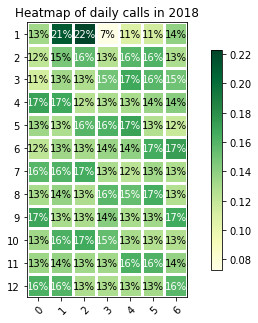

In [86]:
fields = ['month', 'dow']
agg_var = {'duration': 'sum'}
create_heatmap(calls, fields, agg_var, title='Heatmap of daily calls in 2018', 
               cbar_kw={"shrink": .8},
              cmap="YlGn")

**Note to reviewer**

Please note, I have; it is part of the conclusion for this section.

1) Barring the month of January, the heatmap for both call duration shows that for most part the usage across the weekdays is in the 13% - 17% range. In January, there are a few spikes on Monday, Tuesday and Wednesday.

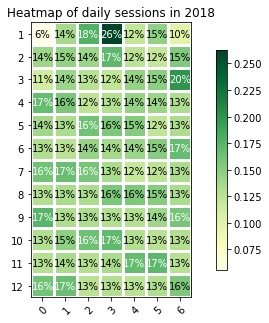

In [87]:
fields = ['month', 'dow']
agg_var = {'mb_used': 'sum'}
create_heatmap(internet, fields, agg_var, title='Heatmap of daily sessions in 2018', 
               cbar_kw={"shrink": .8},
              cmap="YlGn")

1) Barring the month of January, the heatmap for internet sessions shows that for most part the usage across the weekdays is in the 13% - 17% range. In January, there are a few spikes on Monday, Tuesday and Wednesday.

In [88]:
def multiplot_heatmap(df, fields, agg_var, facet_var, facet_list,
                      r=2, c=3, figsize = (20,18), cbar_kw={"shrink": .8},
                     title="", cmap="YlGn", sup_title=None):
    """
    Create multiple heatmaps
    """
#     fig = plt.figure(figsize=figsize)
#     axes = [fig.add_subplot(r, c, i+1) for i in range(r*c)]
    fig, axes = plt.subplots(r, c, figsize=figsize)
#    fig.suptitle(sup_title)
    axes = axes.flatten()
    for idx, facet in enumerate(facet_list):
        subset_df = df[df[facet_var] == facet]
        create_heatmap(subset_df, fields, agg_var, ax=axes[idx], title=facet, 
                       cbar_kw=cbar_kw,
              cmap=cmap, sup_title=sup_title)
    # https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot
    axes[-1].set_visible(False) if len(facet_list) % 2 != 0 else None
    
    

In [89]:
# create a dataframe with users and calls made
user_calls = calls.merge(users[['user_id', 'age_groups', 'plan']], left_on='user_id', right_on='user_id')

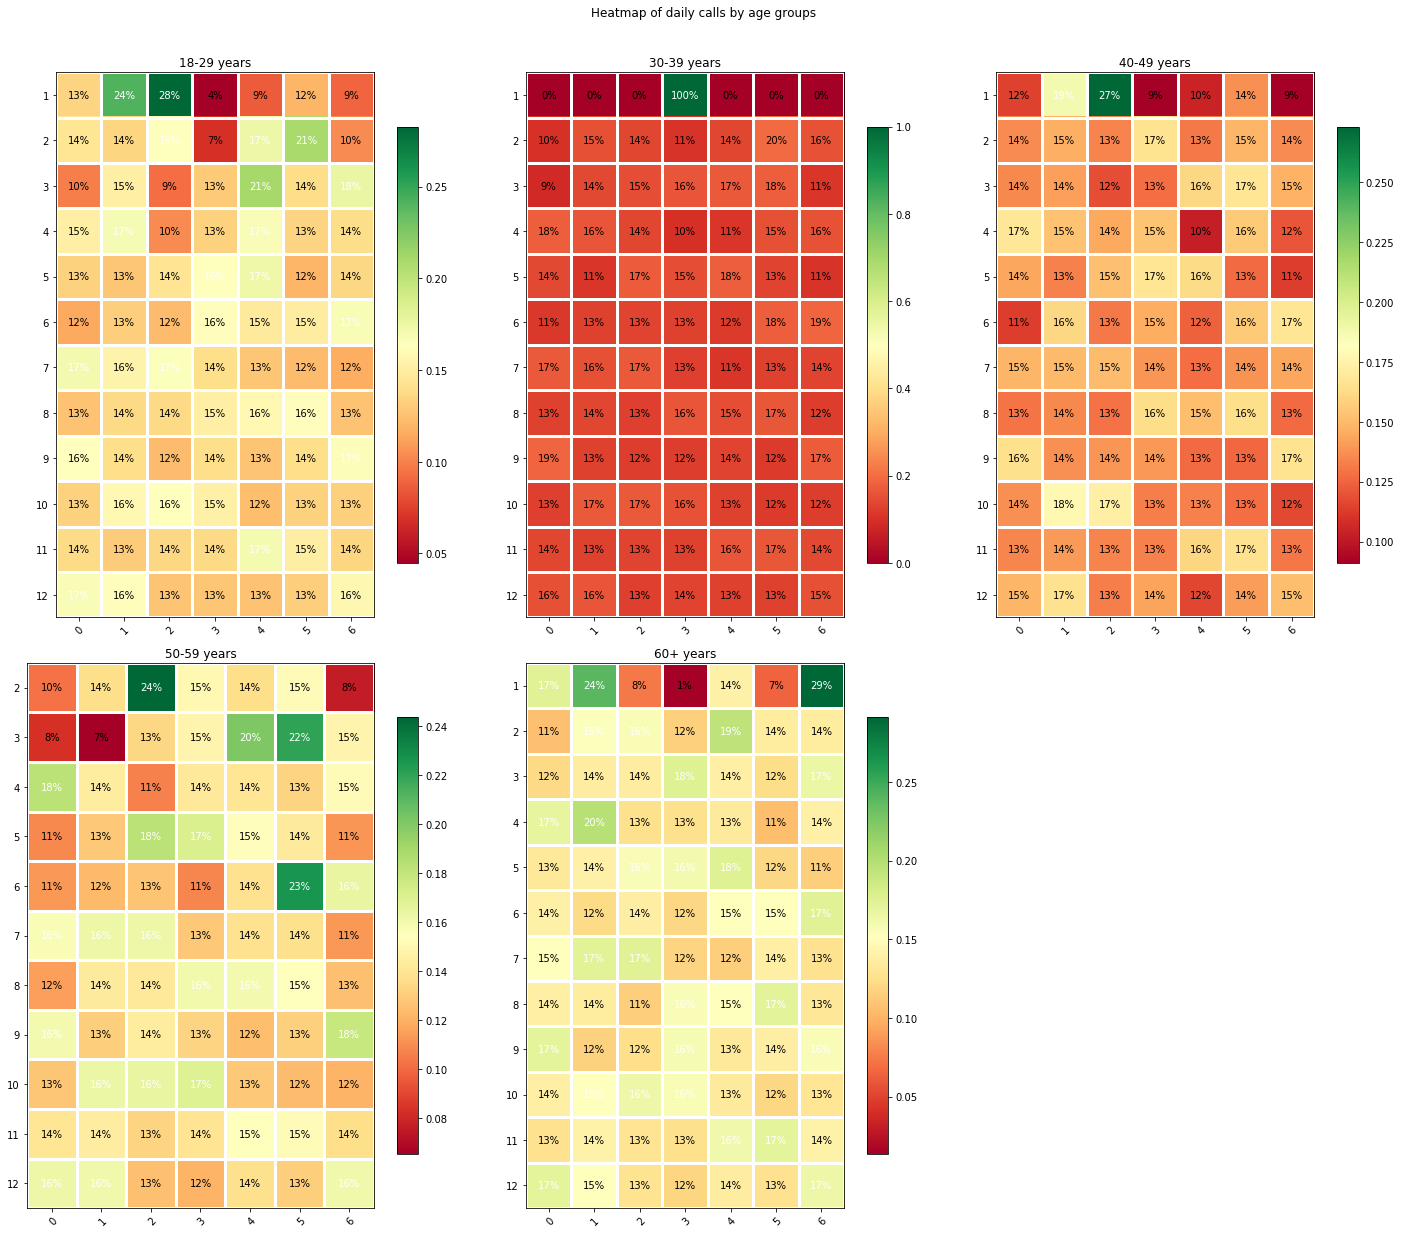

In [90]:
fields = ['month', 'dow']
agg_var = {'duration': 'sum'}
age_dict = {'18-29 years': 1,
           '30-39 years': 2,
           '40-49 years': 3,
           '50-59 years': 4,
           '60+ years': 5}
facet_var = 'age_groups'
facet_list = [k for k, v in sorted(age_dict.items(), key=lambda x: x[1], reverse=False)]
multiplot_heatmap(user_calls, fields, agg_var, facet_var, facet_list, 
                  cbar_kw={"shrink": .8},
                  cmap='RdYlGn',
                  sup_title='Heatmap of daily calls by age groups')

2) Usage pattern by age groups reveal that the 30-39 years is the least actively on both the calls and internet usage; this group is closely lead by the 40-49 years groups. Interestingly, the oldest group, 60+ years has a relatively higher usage pattern for both calls and internet usage. It is no surprise that the 18-29 years is the only other category that's competiting with the 60+ years group.

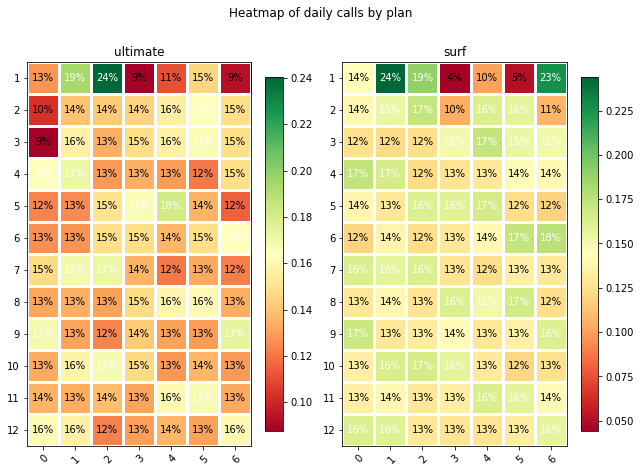

In [91]:
fields = ['month', 'dow']
agg_var = {'duration': 'sum'}
facet_var = 'plan'
facet_list = users[facet_var].unique()
multiplot_heatmap(user_calls, fields, agg_var, facet_var, facet_list, r=1, c=2,
                  figsize=(9, 7),
                  cmap='RdYlGn',
                  sup_title='Heatmap of daily calls by plan')

3) The usage pattern by plan type shows that surf plan users are relatively more active on both the calls and internet usage during the year.

In [92]:
# create a dataframe with users and sessions made
user_sessions = internet.merge(users[['user_id', 'age_groups', 'plan']], left_on='user_id', right_on='user_id')

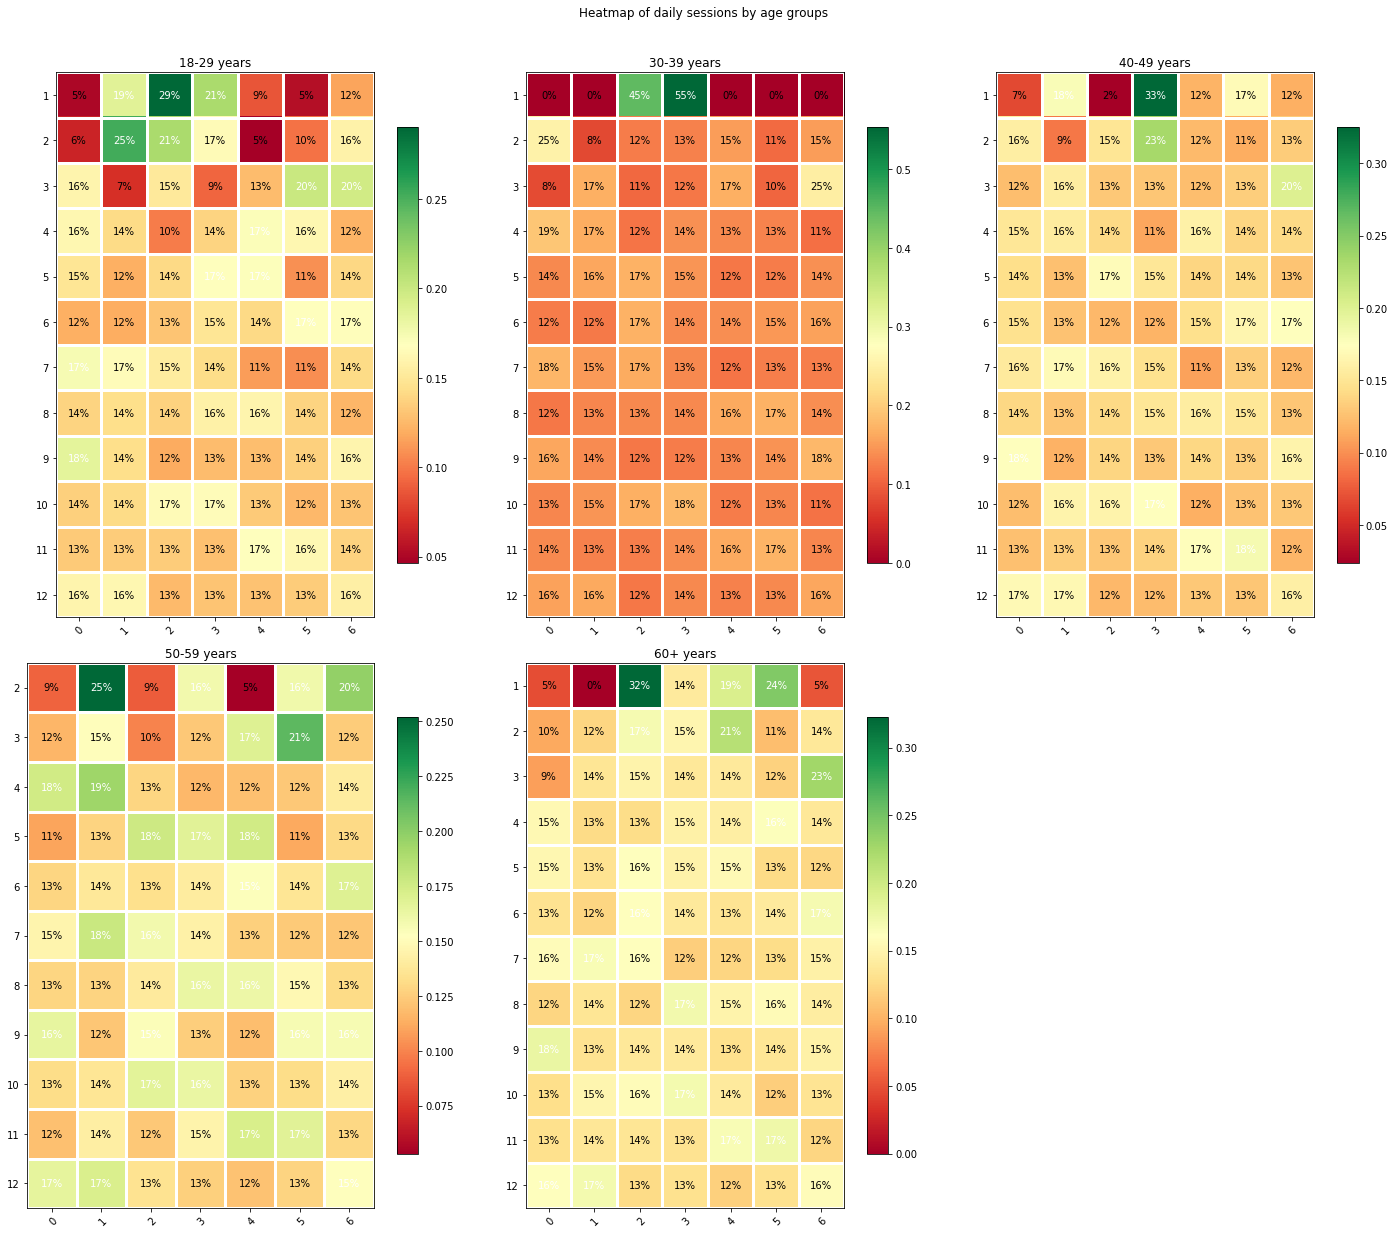

In [93]:
fields = ['month', 'dow']
agg_var = {'mb_used': 'sum'}
facet_var = 'age_groups'
facet_list = [k for k, v in sorted(age_dict.items(), key=lambda x: x[1], reverse=False)]
multiplot_heatmap(user_sessions, fields, agg_var, facet_var, facet_list, 
                  cmap='RdYlGn',
                  sup_title='Heatmap of daily sessions by age groups')

4) Usage pattern by age groups reveal that the 30-39 years is the least actively on both the calls and internet usage; this group is closely lead by the 40-49 years groups. Interestingly, the oldest group, 60+ years has a relatively higher usage pattern for both calls and internet usage. It is no surprise that the 18-29 years is the only other category that's competiting with the 60+ years group.

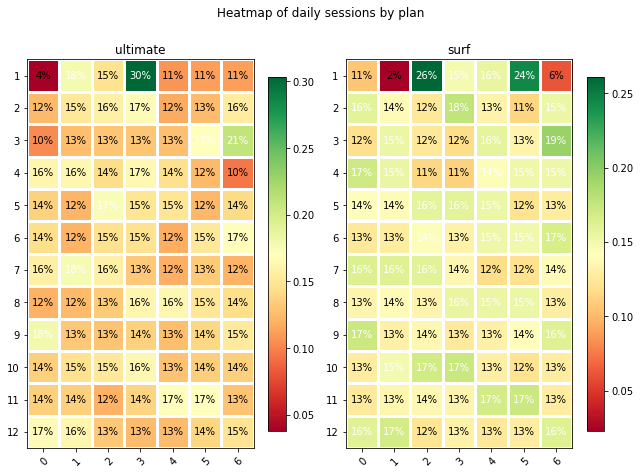

In [94]:
fields = ['month', 'dow']
agg_var = {'mb_used': 'sum'}
facet_var = 'plan'
facet_list = users[facet_var].unique()
multiplot_heatmap(user_sessions, fields, agg_var, facet_var, facet_list, r=1, c=2,
                  figsize=(9, 7),
                  cmap='RdYlGn',
                  sup_title='Heatmap of daily sessions by plan')

5) The usage pattern by plan type shows that surf plan users are relatively more active on both the calls and internet usage during the year.

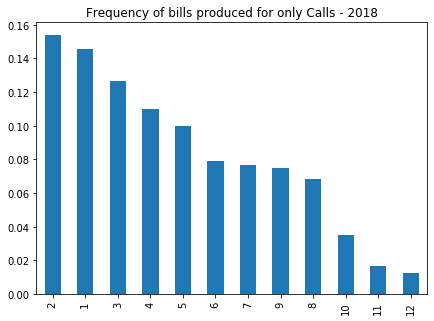

In [95]:
# plot frequency of bills produced for all calls
total_calls['num_bills'].value_counts(normalize=True).plot(kind='bar', title='Frequency of bills produced for only Calls - 2018')
plt.show()

6) Frequency of bills generated during the year shows that the most common number is 2 bills- about 16%.

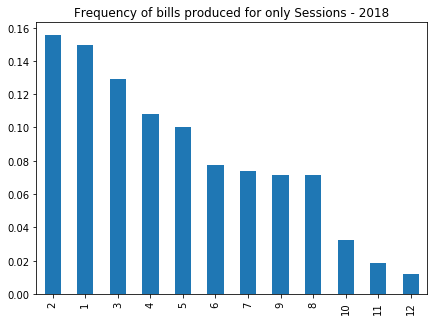

In [96]:
# plot frequency of bills produced for all sessions
total_sessions['num_bills'].value_counts(normalize=True).plot(kind='bar', title='Frequency of bills produced for only Sessions - 2018')
plt.show()

7) Frequency of bills generated (internet sessions) during the year shows that the most common number is 2 bills- about 16%.

In [97]:
def plot_attribute_by_plan(df, grp_var, var, kind='hist', figsize=(7, 5), 
                         is_line=False, bins=50, title=None,
                          label1='', label2=''):
    """
    Plot histogram of revenue, data, call usage
    by plan type
    """
    df_ = df.copy(deep=True)
    plan_dict = dict(zip(df_.groupby(grp_var)[var].mean().index, 
                 df_.groupby(grp_var)[var].mean().values))
    fig = plt.figure(figsize=figsize)
    if is_line:
        df_.set_index('reg_date', inplace=True)
        df_.groupby(grp_var)[var].plot(legend=True, title=title)
        plt.axhline(plan_dict['surf'], color='g', linestyle='-', label=label1)
        plt.axhline(plan_dict['ultimate'], color='r', linestyle='--', label=label2)
    else:
        df_.groupby(grp_var)[var].plot(kind=kind, legend=True, bins=bins, title=title)
        plt.axvline(plan_dict['surf'], color='g', linestyle='-', label=label1)
        plt.axvline(plan_dict['ultimate'], color='r', linestyle='--', label=label2)
    plt.legend()
    plt.show()

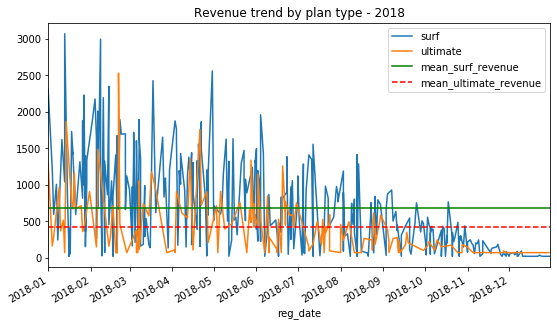

In [98]:
# plot revenue by plan for 2018
grp_var = 'plan'
var = 'revenue'
plot_attribute_by_plan(combined, grp_var, var, kind='hist', figsize=(9, 5), 
                         is_line=True, title='Revenue trend by plan type - 2018',
                      label1='mean_surf_revenue', label2='mean_ultimate_revenue')

8) The revenue for the year shows a declining trend. However, surf plan users generate a higher mean revenue compared with ultimate plan users; it is almost 1.6x.

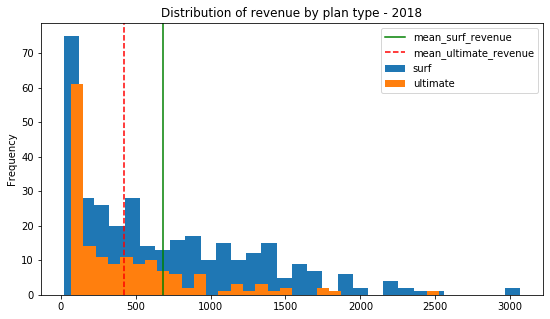

In [99]:
plot_attribute_by_plan(combined, grp_var, var, kind='hist', figsize=(9, 5), 
                         bins=30, title='Distribution of revenue by plan type - 2018',
                      label1='mean_surf_revenue', label2='mean_ultimate_revenue',
                      )

9) The distribution of revenue by plan type shows that there are more surf users than ultimate users. Additionally there is one major peak in the \\$100 region, and a relatively smaller one at $500, and it is right skewed.

In [100]:
# create a new dataframe joining users with calls
user_num_calls = users.merge(total_calls[['user_id', 'num_calls']], left_on='user_id', right_on='user_id')

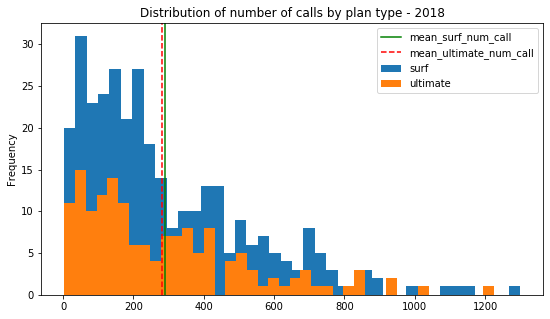

In [101]:
grp_var = 'plan'
var = 'num_calls'
plot_attribute_by_plan(user_num_calls, grp_var, var, kind='hist', figsize=(9, 5), 
                         bins=40, title='Distribution of number of calls by plan type - 2018',
                      label1='mean_surf_num_call', label2='mean_ultimate_num_call')

10) The distribution of number of calls reveals 2 peaks: one at 34 - 67 calls and another 131-164 calls per user for 2018.

In [102]:
# num_call binned into 40 buckets
pd.cut(user_num_calls['num_calls'], bins=40).value_counts().head()

(34.45, 66.9]      46
(131.8, 164.25]    43
(99.35, 131.8]     37
(196.7, 229.15]    35
(66.9, 99.35]      33
Name: num_calls, dtype: int64

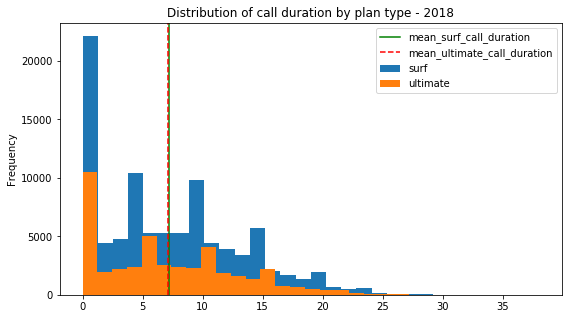

In [103]:
grp_var = 'plan'
var = 'duration'
plot_attribute_by_plan(user_calls, grp_var, var, kind='hist', figsize=(9, 5), 
                         bins=30, title='Distribution of call duration by plan type - 2018',
                      label1='mean_surf_call_duration', label2='mean_ultimate_call_duration')

11) The distribution for call duration multiple peaks; the major peak for surf and ultimate users is at 1.2 minutes per day. The other peaks occur on a slight hump at 3 - 6 minutes and 8 - 11 minutes for both plans included.

In [104]:
# duration binned into 30 buckets
print('surf usage', pd.cut(user_calls[user_calls['plan'] == 'surf']['duration'], bins=30).value_counts().head())
print('ultimate usage', pd.cut(user_calls[user_calls['plan'] == 'ultimate']['duration'], bins=30).value_counts().head())

surf usage (-0.038, 1.267]    22142
(3.8, 5.067]       10394
(8.867, 10.133]     9797
(13.933, 15.2]      5674
(7.6, 8.867]        5302
Name: duration, dtype: int64
ultimate usage (-0.037, 1.233]    10487
(4.933, 6.167]      5009
(9.867, 11.1]       4126
(6.167, 7.4]        2522
(7.4, 8.633]        2416
Name: duration, dtype: int64


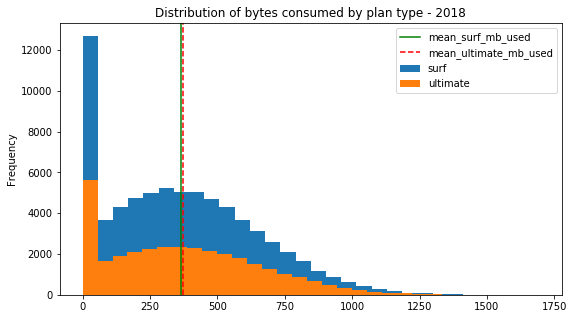

In [105]:
grp_var = 'plan'
var = 'mb_used'
plot_attribute_by_plan(user_sessions, grp_var, var, kind='hist', figsize=(9, 5), 
                         bins=30, title='Distribution of bytes consumed by plan type - 2018',
                      label1='mean_surf_mb_used', label2='mean_ultimate_mb_used')

12) The distribution for internet usage shows a major peak at about 55MB per day for both plans; this is followed by a hump like shape, which peaks at 280 - 340 MB for both plans.

In [106]:
# mb_used binned into 30 buckets
print('surf usage', pd.cut(user_sessions[user_sessions['plan'] == 'surf']['mb_used'], bins=30).value_counts().head())
print('ultimate usage', pd.cut(user_sessions[user_sessions['plan'] == 'ultimate']['mb_used'], bins=30).value_counts().head())

surf usage (-1.693, 56.449]      12688
(282.245, 338.694]     5212
(338.694, 395.143]     5047
(395.143, 451.592]     5046
(225.796, 282.245]     4990
Name: mb_used, dtype: int64
ultimate usage (-1.668, 55.601]      5620
(333.606, 389.207]    2348
(278.005, 333.606]    2333
(389.207, 444.808]    2301
(222.404, 278.005]    2266
Name: mb_used, dtype: int64


In [107]:
# create a new dataframe joining users with messages
user_messages = users.merge(total_messages[['user_id', 'num_messages']], left_on='user_id', right_on='user_id')

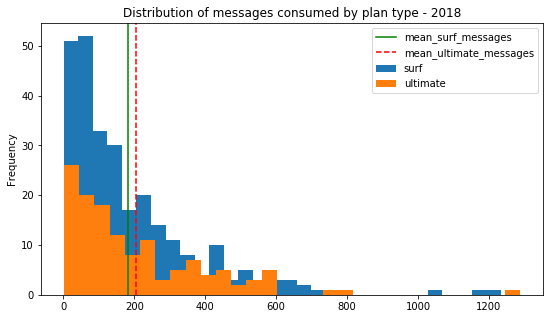

In [108]:
grp_var = 'plan'
var = 'num_messages'
plot_attribute_by_plan(user_messages, grp_var, var, kind='hist', figsize=(9, 5), 
                         bins=30, title='Distribution of messages consumed by plan type - 2018',
                      label1='mean_surf_messages', label2='mean_ultimate_messages')

In [109]:
# create a dataframe to plot plan usage by age_groups
plan_ages = users[['plan', 'age_groups']].copy()
plan_ages['age_groups'] = pd.Categorical(plan_ages['age_groups'], ['18-29 years', 
                                                             '30-39 years',
                                                             '40-49 years',
                                                             '50-59 years',
                                                             '60+ years']
                                        )
plan_ages.sort_values('age_groups', inplace=True)

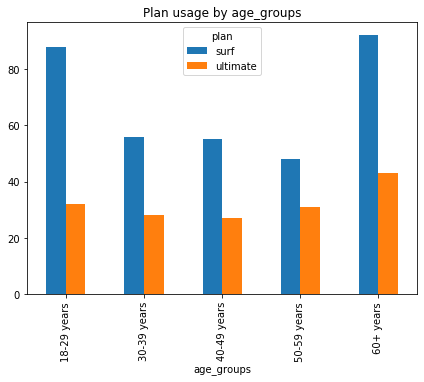

In [110]:
plan_ages.pivot_table(index=['age_groups'], columns='plan', aggfunc='size').plot(kind='bar',
                                                                                stacked=False, 
                                                                                title='Plan usage by age_groups')
plt.show()

13) The grouped bar plot shows an interesting observation: most of the users are in the 60+ category, followed by the 18-29 years categories - 2 extremes.

**Conclusion**

1) Barring the month of January, the heatmap for both call duration and internet sessions shows that for most part the usage across the weekdays is in the 13% - 17% range. In January, there are a few spikes on Monday, Tuesday and Wednesday.

2) Usage pattern by age groups reveal that the 30-39 years is the least actively on both the calls and internet usage; this group is closely lead by the 40-49 years groups. Interestingly, the oldest group, 60+ years has a relatively higher usage pattern for both calls and internet usage. It is no surprise that the 18-29 years is the only other category that's competiting with the 60+ years group.

3) The usage pattern by `plan` type shows that surf plan users are relatively more active on both the calls and internet usage during the year.

4) Frequency of bills generated during the year shows that the most common number is 2 bills- about 16%.

5) The revenue for the year shows a declining trend. However, surf plan users generate a higher mean revenue compared with ultimate plan users; it is almost 1.6x.

6) The distribution of revenue by `plan` type shows that there are more surf users than ultimate users. Additionally there is one major peak in the \\$100 region, and a relatively smaller one at \$500, and it is right skewed.

7) The distribution of number of calls reveals 2 peaks: one at 34 - 67 calls and another 131-164 calls per user for 2018.

8) The distribution for call duration multiple peaks; the major peak for surf and ultimate users is at 1.2 minutes per day. The other peaks occur on a slight hump at 3 - 6 minutes and 8 - 11 minutes for both plans included.

9) The distribution for internet usage shows a major peak at about 55MB per day for both plans; this is followed by a hump like shape, which peaks at 280 - 340 MB for both plans.

10) The plots reveal that the users of these plans are not heavy users of either data or voice.

11) The grouped bar plot shows an interesting observation: most of the users are in the 60+ category, followed by the 18-29 years categories - 2 extremes.

### Hypothesis testing

1) Are the average revenues from surf users different from the revenues from ultimate users?

\$H_{0}: \mu_{surf} \= \mu_{ultimate}\$

\$H_{1}: \mu_{surf} \ne \mu_{ultimate}\$

Collect the sample means for both surf and ultimate users. Since we are testing for equality
of 2 independent sample means coming from the same telco we will use T test for independence, and assume
that their variance is similar.

\$ \mu_{surf} \= \\$679 \$

\$ \mu_{ultimate} \= \\$420 \$

\$alpha \= 0.05 \$

In [111]:
sample_revenue_surf = combined[combined['plan'] == 'surf']['revenue']
sample_revenue_ultimate = combined[combined['plan'] == 'ultimate']['revenue']

alpha = 0.05
results = stats.ttest_ind(sample_revenue_surf, sample_revenue_ultimate)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: 2.0680783647876335e-06
We reject the null hypothesis


1) In the first hypothesis testing: are the average revenues from surf and ultimate users different. We can conclude that there is evidence to show that the results are statistically significant. Therefore, we can reject the null hypothesis that the revenues from users of both plans are identical.

2) Are the average revenues from users in NY-NJ area is different from that of the users from other regions?

\$H_{0}: \mu_{NY-NJ} \= \mu_{Others}\$

\$H_{1}: \mu_{NY-NJ} \ne \mu_{Others}\$

Collect the sample means for both Ny-NJ and Other users. Since we are testing for equality
of 2 independent sample means coming from the same telco we will use T test for independence, and assume
that their variance is similar.

\$ \mu_{NY-NJ} \= \\$670 \$

\$ \mu_{Others} \= \\$580 \$

\$alpha \= 0.05 \$

Note: In the data, there is no specific are called NY-NJ; the closest is NY-NZ-PA. In addition, there is another
are called NY. I will be using these 2 MSAs in my analysis

In [112]:
states = ['NY-NJ-PA', 'NY']
sample_revenue_ny_nj= combined[combined['state'].isin(states)]['revenue']
sample_revenue_others = combined[~combined['plan'].isin(states)]['revenue']

alpha = 0.05
results = stats.ttest_ind(sample_revenue_ny_nj, sample_revenue_others)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: 0.2716809296251758
We can't reject the null hypothesis


**Conclusion**

1) In the first hypothesis testing: are the average revenues from surf and ultimate users different. We can conclude that there is evidence to show that the results are statistically significant. Therefore, we can reject the null hypothesis that the revenues from users of both plans are identical.
    
2) In the second hypothesis testing: are the average revenues from NY-NJ users different from the rest of the State users, we cannot conclude that the results are statsitically significant. Therefore, we fail to reject the null hypothesis that the revenues from both groups are identical.

### Conclusion

1) There are 500 customers, in 2018, who have a choice between 2 plans: 1) Surf. 2) Ultimate.

2) 68% of the users have subscribed to surf plan as opposed to 32% who use ultimate.

3) 7% of the users have churned in 2018.

4a) Average number of calls per month per user in 2018 is 24

4b) Average duration of call per month per user in 2018 is 171 minutes

4c) Average duration of session per month per user in 2018 is 6 GB

4d)Average number of messages per month per user in 2018 is 16

4e) Average revenue per month per user in 2018 is $50

This shows that the users in this telco are not that heavy users of either data or calls. Either the service is poor
or the plans appear pricey, or maybe it is new to the market.

5) The most of the subscribers are in 60+ years category; they make up 27% of the population; they are followed closely by the other extreme group, age-wise, of users in the 18-29 years who make up 24% of the population.

6) Finally, the hypothesis test on whether the average revenue between surf users and ultimate users being different is concerned shows that the results are statistically significant such that we reject the null.

7) However, the hypothesis test on whether the average revenue between NY-NJ area users being different from the rest of the population doesn't show any statistical significance.

8) Based on the statistical analysis, we can conclude that Surf plan is relatively more profitable for the telco.